<a href="https://colab.research.google.com/github/leemutai/Intro_to_datascience/blob/main/usingSilhoutteInPCAwithKmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab import files

In [2]:
# Upload the dataset file
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
# Load the dataset
for name, data in uploaded.items():
    dataset = pd.read_csv(name)

In [4]:
# Separate features and labels
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [7]:
# Silhouette method to determine the optimal number of clusters
silhouette_scores = []
K = range(2, 11)  # Testing from 2 to 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)
    print(f'Silhouette Score for {k} clusters: {score}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 2 clusters: 0.5687897205830247


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 3 clusters: 0.5104287492214447


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 4 clusters: 0.42774937689821346
Silhouette Score for 5 clusters: 0.3969180143549049


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 6 clusters: 0.32925689596204044


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 7 clusters: 0.33359227428351756


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 8 clusters: 0.35036064213472234


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 9 clusters: 0.33962994537552743
Silhouette Score for 10 clusters: 0.2892769519864188


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
# Determine the optimal number of clusters
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because range starts from 2
print(f'\nThe optimal number of clusters is {optimal_k} with a silhouette score of {max(silhouette_scores)}')


The optimal number of clusters is 2 with a silhouette score of 0.5687897205830247


In [9]:
# Apply KMeans with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(X)
labels = kmeans_optimal.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
# Calculate silhouette score for the optimal number of clusters
optimal_silhouette_score = silhouette_score(X, labels)
print(f'Silhouette Score for the optimal number of clusters ({optimal_k}): {optimal_silhouette_score}')

Silhouette Score for the optimal number of clusters (2): 0.5687897205830247


In [12]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
y_kmeans_pca = kmeans.predict(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


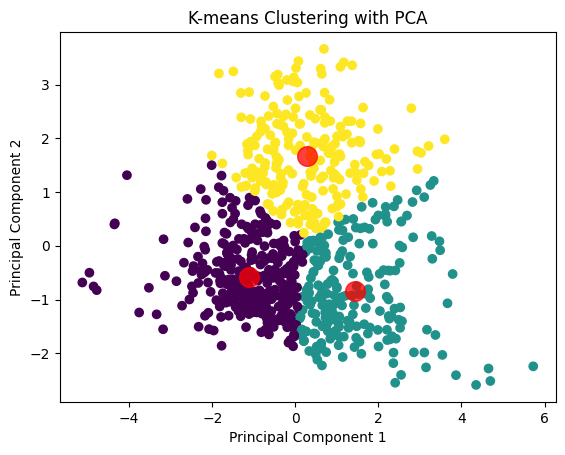

In [13]:
# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans_pca, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA')
plt.show()